In [100]:
import matplotlib.pyplot as plt
%matplotlib inline

# Newton-Raphson

In [90]:
import numpy as np
np.random.seed(222)

X = np.random.normal(0,2, (10, 2))
f_target = lambda x: x[0]+2*x[1]

Y = np.apply_along_axis(arr=X, axis=1, func1d=f_target).reshape(-1,1)

W = np.random.normal(0,2,len(X[0])).reshape(1,-1)



f = lambda X, W: np.dot(X, W.T)

loss = lambda Y,X,W: np.square(Y-f(X,W))/2
loss_der = lambda Y,X,W: (Y-f(X,W))*X

# optimize using newton-rhapson
lr=1e-4
for i in range(1000):
    W = W + np.mean(loss(Y,X,W)/(loss_der(Y,X,W)), axis=0)*lr


W

array([[-1.05092661, -1.08230369]])

# Linear Regression

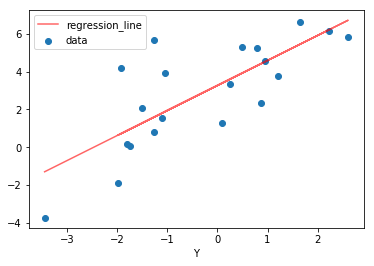

In [113]:
import numpy as np
np.random.seed(222)

NUM_POINTS=20

noise = 0
noise = np.random.normal(0,2, (NUM_POINTS,1))

data = np.random.normal(0,2, (NUM_POINTS, 1))
X = data.copy()
f_target = lambda x: x[0]+3

bias = True

Y = np.apply_along_axis(arr=X, axis=1, func1d=f_target).reshape(-1,1) + noise

if bias:
    X = np.hstack([X, np.ones((len(X), 1))])
    
W = np.random.normal(0,2,len(X[0])).reshape(1,-1)

f = lambda X, W: np.dot(X, W.T)

loss = lambda Y,X,W: np.square(Y-f(X,W))/2
loss_der = lambda Y,X,W: (Y-f(X,W))*X

# optimize using newton-rhapson
lr=1e-3
for i in range(5000):
    W = W + np.mean(loss_der(Y,X,W), axis=0)*lr

    
plt.scatter(data, Y, label='data')
plt.plot(data, f(X,W), c='red', alpha=.6, label='regression_line')
plt.xlabel('X')
plt.xlabel('Y')
plt.legend()



# Logistic Regression Binomial

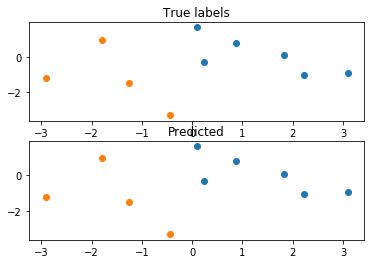

In [204]:
import numpy as np
np.random.seed(222)

NUM_POINTS = 10
NUM_CLASSES = 2

noise = 0
noise = np.random.normal(0,2, (NUM_POINTS,1))

data = np.random.normal(0,2, (NUM_POINTS, 2))
X = data.copy()
f_target = lambda x: x[0]

bias = True

Y = (np.apply_along_axis(arr=X, axis=1, func1d=f_target).reshape(-1,1))>0
Y = Y.astype(np.int32)

if bias:
    X = np.hstack([X, np.ones((len(X), 1))])
    
W = np.random.normal(0,2,(1, len(X[0])))

f = lambda X, W: np.dot(X, W.T)

def sigmoid(X, W):
    y = X@W.T
    y = np.exp(y)
    y = 1/(1+y)
    return y
    
def cross_entropy(Y, Y_, p):
    return -np.sum((Y!=Y_)*np.log(p))

def grad_sigmoid(Y,X, W):
    
    g = sigmoid(X,W)
    g = g*(1-g)
    return g
    
def grad(Y,X,W):
    sig = sigmoid(X,W)
    g = Y-sig
    return g.T@X


lr=1e-4
for i in range(10000):
    for j in range(0, len(X), 2):
        p = sigmoid(X[j:j+2],W)        
        Y_ = (p>0.5).astype(np.int32)
        loss = cross_entropy(Y[j:j+2],Y_, p)
        g = grad(Y[j:j+2],X[j:j+2],W)
        W -= lr*g
    if i%1000 == 0:
        print(f'Loss: {np.sum(loss)}', end='\r')



        
# Plot the results

Y_ = (sigmoid(X,W)>.5).astype(np.int32)
c1, c2 = data[Y.flatten()==1], data[Y.flatten()!=1]
c1_, c2_ = data[Y_.flatten()==1], data[Y_.flatten()!=1]


plt.subplot(211)
plt.title('True labels')
plt.scatter(c1[:,0], c1[:,1])
plt.scatter(c2[:,0], c2[:,1])

plt.subplot(212)
plt.title('Predicted')
plt.scatter(c1_[:,0], c1_[:,1])
plt.scatter(c2_[:,0], c2_[:,1])

# Logistic Regression 2

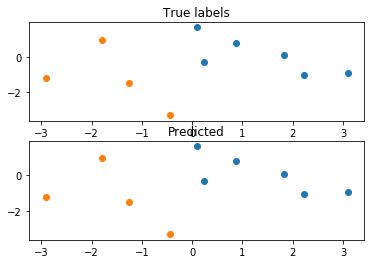

In [199]:
import numpy as np
np.random.seed(222)

NUM_POINTS = 10
NUM_CLASSES = 2

noise = 0
noise = np.random.normal(0,2, (NUM_POINTS,1))

data = np.random.normal(0,2, (NUM_POINTS, 2))
X = data.copy()
f_target = lambda x: x[0]

bias = True

Y = (np.apply_along_axis(arr=X, axis=1, func1d=f_target).reshape(-1,1))>0
Y = Y.astype(np.int32)

if bias:
    X = np.hstack([X, np.ones((len(X), 1))])
    
W = np.random.normal(0,2,(NUM_CLASSES, len(X[0])))

f = lambda X, W: np.dot(X, W.T)

def softmax(X,W):
    y = np.exp(X@W.T)
    y = y/np.sum(y, axis=1).reshape(-1,1)
    return y

def cross_entropy(Y, Y_, p):
    return -np.sum((Y!=Y_)*np.log(p))
    

def grad_softmax(Y,X, W):
    
    g = softmax(X,W)
    g[np.arange(Y.shape[0]), Y]-=1
    return g
    
def grad(Y,X,W):
    g_soft = grad_softmax(Y,X,W)
    g=g_soft.T@X
    # divide by batch size
    g/=Y.shape[0]
    return g


lr=1e-4
for i in range(10000):
    for j in range(0, len(X), 2):
        p = softmax(X[j:j+2],W)
        Y_ = np.argmax(p, axis=1)[:, None]
        loss = cross_entropy(Y[j:j+2],Y_, p)
        g = grad(Y[j:j+2],X[j:j+2],W)
        W -= lr*g
    if i%1000 == 0:
        print(f'Loss: {np.sum(loss)}', end='\r')



        
# Plot the results

Y_ = np.argmax(softmax(X,W), axis=1)[:, None]

c1, c2 = data[Y.flatten()==1], data[Y.flatten()!=1]
c1_, c2_ = data[Y_.flatten()==1], data[Y_.flatten()!=1]


plt.subplot(211)
plt.title('True labels')
plt.scatter(c1[:,0], c1[:,1])
plt.scatter(c2[:,0], c2[:,1])

plt.subplot(212)
plt.title('Predicted')
plt.scatter(c1_[:,0], c1_[:,1])
plt.scatter(c2_[:,0], c2_[:,1])